In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))
from mpmath import mp
#from mpmath import e

In [56]:
samplesize = 2000
X = []
for i in range(samplesize):
    sample1 = my_norm(1,2).rvs(100)
    sample2 = my_norm(3.3,2.6).rvs(100)
    X.append(stat.pearsonr(sample1, sample2)[0])

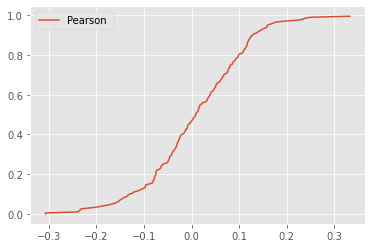

In [35]:
N = samplesize
y = np.arange(0, 1, 1/N)
X.sort()
plt.plot(list(map(lambda y: X[int(y*N)], y)), y,label = 'Pearson ')
plt.legend()
plt.show()

In [57]:

X2 = []
for i in range(samplesize):
    sample1 = my_norm(6,2).rvs(100)
    sample2 = stat.expon(1).rvs(100)
    X2.append(stat.pearsonr(sample1, sample2)[0])

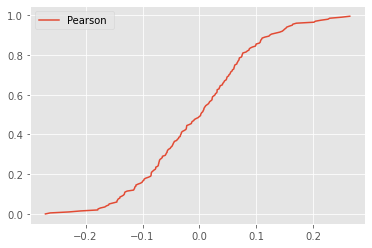

In [38]:
N = samplesize
y = np.arange(0, 1, 1/N)
X.sort()
plt.plot(list(map(lambda y: X[int(y*N)], y)), y,label = 'Pearson ')
plt.legend()
plt.show()

In [58]:

X3 = []
for i in range(samplesize):
    sample1 = stat.uniform(1,2).rvs(100)
    sample2 = stat.uniform(1.2, 2.3).rvs(100)
    X3.append(stat.pearsonr(sample1, sample2)[0])

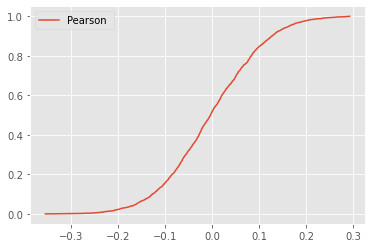

In [59]:
N = samplesize
y = np.arange(0, 1, 1/N)
X.sort()
plt.plot(list(map(lambda y: X[int(y*N)], y)), y,label = 'Pearson ')
plt.legend()
plt.show()

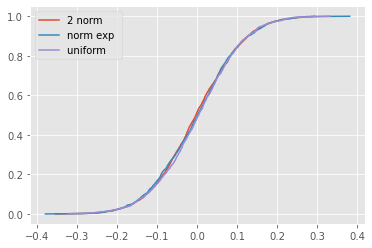

In [60]:
X.sort(); X2.sort(); X3.sort()
plt.plot(list(map(lambda y: X[int(y*N)], y)), y,label = '2 norm')
plt.plot(list(map(lambda y: X2[int(y*N)], y)), y,label = 'norm exp ')
plt.plot(list(map(lambda y: X3[int(y*N)], y)), y,label = 'uniform ')
plt.legend()
plt.show()

# TASK 2

### Распределение по кольцу

In [3]:
def gen_n(n):
    gen_s = [[], []]
    for i in range(n):
        gen_s[0].append(stat.uniform().rvs() * 2 * m.pi)
        gen_s[1].append(m.sqrt(stat.uniform.rvs() * 0.5 + 1))
    return gen_s

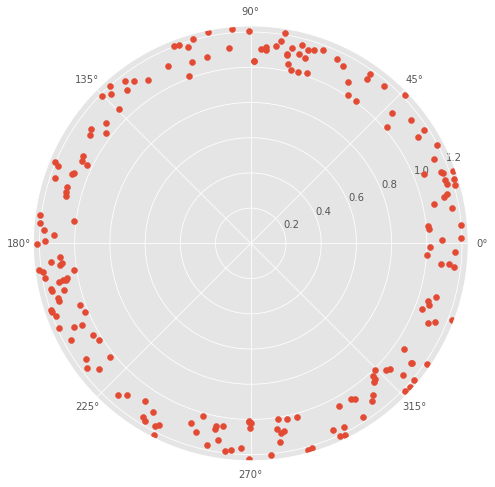

In [4]:
sample = gen_n(200)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(sample[0], sample[1])

##### В полярных:

In [5]:
samplesize = 100
spearman = []; kendall = []
spr = []; kentau = []
for i in range(samplesize):
    sample = gen_n(100)
    phis = sample[0]
    rhos = sample[1]
    
    spearman.append(stat.spearmanr(phis, rhos).correlation)
    kendall.append(stat.kendalltau(phis, rhos).correlation)
    spr.append(stat.spearmanr(phis, rhos).pvalue); kentau.append(stat.kendalltau(phis, rhos).pvalue)

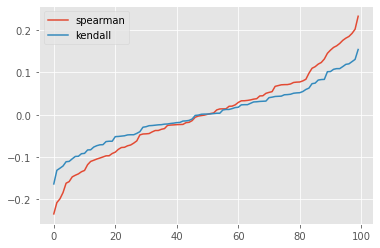

In [6]:
plt.plot(np.arange(0, samplesize), np.sort(spearman), label = 'spearman');
plt.plot(np.arange(0, samplesize), np.sort(kendall), label = 'kendall');
plt.legend();

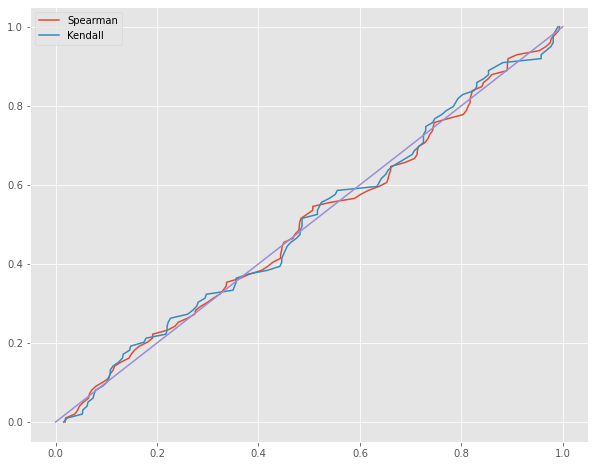

In [7]:
x_axes = np.linspace(0, 1, samplesize)

plt.figure(figsize = (10,8))
plt.plot(sorted(spr), x_axes, label = 'Spearman')
plt.plot(sorted(kentau), x_axes, label = 'Kendall')
plt.plot(x_axes, x_axes)
plt.legend()

plt.show()

#### В декартовых:

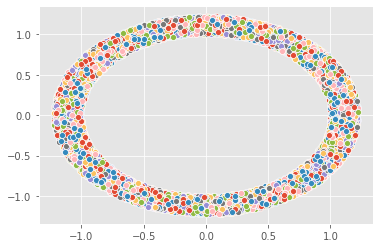

In [52]:
samplesize = 100
spearman = []; kendall = []
spr = []; kentau = []
for i in range(samplesize):
    sample = gen_n(100)
    phis = sample[0]
    rhos = sample[1]
    
    xs = np.cos(phis) * rhos
    ys = np.sin(phis) * rhos
    
    sb.scatterplot(xs, ys)
    
    spearman.append(stat.spearmanr(xs, ys).correlation)
    kendall.append(stat.kendalltau(xs, ys).correlation)
    spr.append(stat.spearmanr(xs, ys).pvalue); kentau.append(stat.kendalltau(xs, ys).pvalue)
    
plt.show()
spr = [1 - elem for elem in spr]
kentau = [1 - elem for elem in kentau]

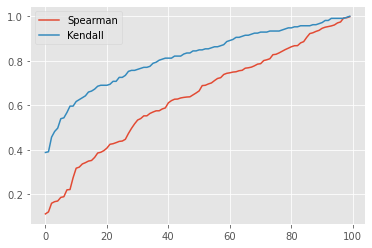

In [26]:
plt.plot(np.arange(0, samplesize), np.sort(spr), label = 'Spearman');
plt.plot(np.arange(0, samplesize), np.sort(kentau), label = 'Kendall');
#plt.plot(np.arange(0, samplesize), np.arange(0, samplesize) / 100);
plt.legend();

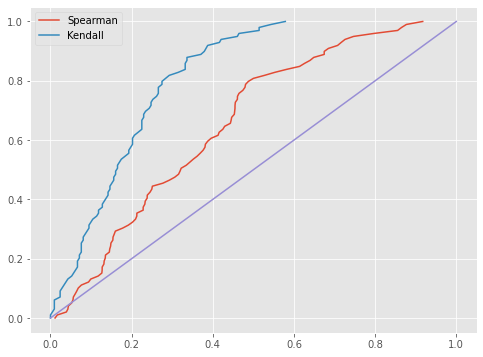

In [53]:
x_axes = np.linspace(0, 1, samplesize)


plt.figure(figsize = (8,6))
plt.plot(sorted(spr), x_axes, label = 'Spearman')
plt.plot(sorted(kentau), x_axes, label = 'Kendall')
plt.plot(x_axes, x_axes)
plt.legend()

plt.show()

(но здесь наоборот, большие p-value(!))малые p-value => большие к-ты корреляции => наличие зависимости

###### Kendall
The two-sided p-value for a hypothesis test whose null hypothesis is an $\textit{absence of association}$, tau = 0.

###### K - S test
tests whether 2 samples are drawn from the same distribution

(нулевая гипотеза - наличие прямой связи)

In [32]:
x1 = [1,2,4,8]; x2=[1,2,4,8]
stat.kendalltau(x1, x2)
stat.spearmanr(x1,x2)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [33]:
stat.ks_2samp(x1, x2, alternative='two-sided', mode='auto')

KstestResult(statistic=0.0, pvalue=1.0)

## Распределение по квадрату

In [54]:
def gen2(n):
    g_sample = [[], []]
    for i in range(n):
        x = m.sqrt(2 * stat.uniform().rvs() + 0.25) - 0.5
        #R2 = stat.uniform().rvs()
        g_sample[0].append(x)
        g_sample[1].append(m.sqrt(stat.uniform().rvs() * (2 * x + 1) + x * x) - x)
        
    return g_sample

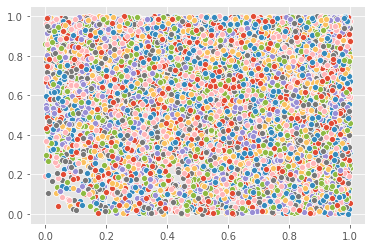

In [58]:
samplesize = 100
spearman = []; kendall = []
spr = []; kentau = []
for i in range(samplesize):
    sample = gen2(100)
    xs = sample[0]
    ys = sample[1]

    sb.scatterplot(xs, ys)
    
    spearman.append(stat.spearmanr(xs, ys).correlation)
    kendall.append(stat.kendalltau(xs, ys).correlation)
    spr.append(stat.spearmanr(xs, ys).pvalue); kentau.append(stat.kendalltau(xs, ys).pvalue)
    
plt.show()

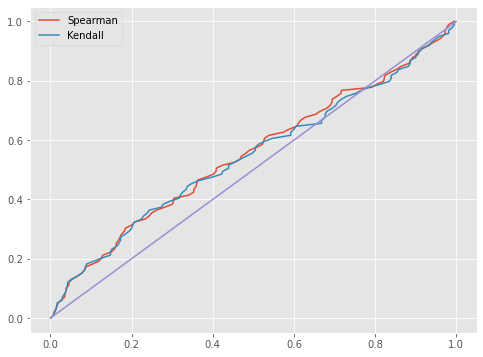

In [59]:
x_axes = np.linspace(0, 1, samplesize)


plt.figure(figsize = (8,6))
plt.plot(sorted(spr), x_axes, label = 'Spearman')
plt.plot(sorted(kentau), x_axes, label = 'Kendall')
plt.plot(x_axes, x_axes)
plt.legend()

plt.show()

#### "Квадратное кольцо"

In [8]:
def gen_ring(n):
    counter = 0; sample = []
    while (counter  < n):
        x = stat.uniform(loc = -1.5, scale = 3).rvs(1)[0]
        y = stat.uniform(loc = -1.5, scale = 3).rvs(1)[0]
        
        if (1 <= abs(x) + abs(y) <= 1.5):
            sample.append([x,y])
            counter += 1
            
    return sample


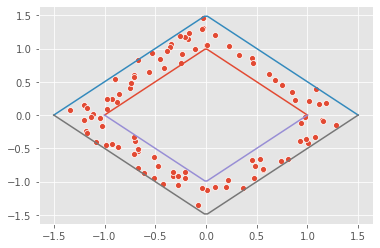

In [27]:
sample = gen_ring(100)
sb.scatterplot([elem[0] for elem in sample], [elem[1] for elem in sample])
xaxes = np.linspace(-1.5, 1.5, 100)
xaxesmall = np.linspace(-1, 1, 100)
plt.plot(xaxesmall, [1 - abs(elem) for elem in xaxesmall]); plt.plot(xaxes, [1.5 - abs(elem) for elem in xaxes])
plt.plot(xaxesmall, [-1 + abs(elem) for elem in xaxesmall]); plt.plot(xaxes, [-1.5 + abs(elem) for elem in xaxes])
plt.show()

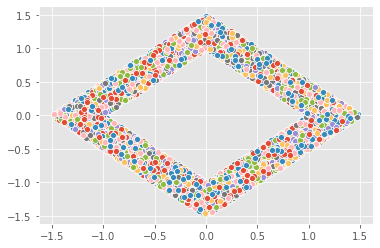

In [28]:
samplesize = 100
spearman = []; kendall = []
spr = []; kentau = []
for i in range(samplesize):
    sample = gen_ring(100)
    xs = [elem[0] for elem in sample]
    ys = [elem[1] for elem in sample]

    sb.scatterplot(xs, ys)
    
    spearman.append(stat.spearmanr(xs, ys).correlation)
    kendall.append(stat.kendalltau(xs, ys).correlation)
    spr.append(stat.spearmanr(xs, ys).pvalue); kentau.append(stat.kendalltau(xs, ys).pvalue)
    
plt.show()

In [34]:
spr = [1 - elem for elem in spr]
kentau = [1 - elem for elem in kentau]

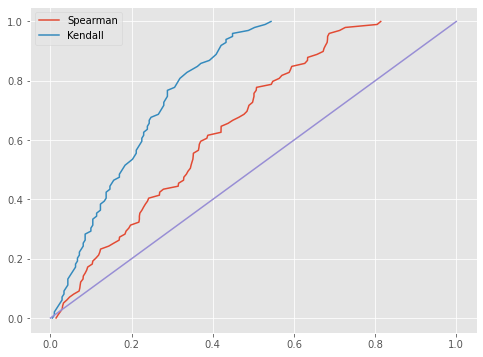

In [35]:
x_axes = np.linspace(0, 1, samplesize)


plt.figure(figsize = (8,6))
plt.plot(sorted(spr), x_axes, label = 'Spearman')
plt.plot(sorted(kentau), x_axes, label = 'Kendall')
plt.plot(x_axes, x_axes)
plt.legend()

plt.show()